<a href="https://colab.research.google.com/github/kanchu9462/Deep-Learning-6--8-pm-Tue-wed/blob/main/MobileMulticlass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Price Range Multiclass classification

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

Read the train data

In [3]:
import pandas as pd
df= pd.read_csv('/train_mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.duplicated().sum()

0

# Seperate X and Y(price_range)

In [7]:
X =df.drop(columns=['price_range'])
Y= df[['price_range']]

In [8]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [9]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['price_range'].plot(kind='hist', bins=20, title='price_range')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='price_range', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['price_range']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('price_range')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['price_range'].plot(kind='line', figsize=(8, 4), title='price_range')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
Y.value_counts()

price_range
0              500
1              500
2              500
3              500
dtype: int64

# preprocess the data on x

In [12]:
from sklearn.pipeline import Pipeline
from sklearn. impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps =[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())]).set_output(transform='pandas')

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


# Apply train test split

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [17]:
xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1.558089,-0.990050,-1.253064,0.981177,0.619880,-1.043966,0.769162,-0.006069,1.434017,-1.539175,0.013773,0.274736,1.174484,-0.585741,-0.547577,0.742313,-1.466521,0.559641,0.994018,0.986097
240,-1.378345,1.010051,0.830779,-1.019184,-0.992890,0.957886,0.934531,-1.393304,-0.035292,1.521249,-1.470690,-0.261699,-0.561260,1.323964,-0.310171,-1.094526,0.913303,0.559641,0.994018,0.986097
819,-0.005733,-0.990050,-0.762748,0.981177,-0.532099,0.957886,1.375517,-1.393304,1.349249,-1.539175,0.673534,-0.288746,-1.024125,-0.662277,0.402047,1.431127,1.645557,0.559641,-1.006018,0.986097
692,-1.041452,-0.990050,-0.517590,-1.019184,-0.532099,-1.043966,0.328176,-0.352878,1.631808,0.209639,-0.481048,-0.768833,0.977767,1.276014,0.164641,0.512708,-1.100394,-1.786861,-1.006018,0.986097
420,0.495054,1.010051,-1.253064,0.981177,0.619880,-1.043966,-1.380644,-0.352878,-0.995993,0.209639,0.343653,0.400956,-0.341399,-0.495373,-1.497202,-0.176107,1.645557,0.559641,-1.006018,0.986097


In [18]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [19]:
xtest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1860,0.927552,-0.990050,1.198517,-1.019184,-0.301703,0.957886,-0.388426,0.340740,1.688320,-1.101971,-0.810929,-0.978448,0.825021,-1.326201,-1.022389,0.053498,-0.002014,0.559641,0.994018,-1.014099
353,-0.128653,-0.990050,-1.253064,-1.019184,0.619880,0.957886,-1.325520,-0.006069,-0.063548,1.521249,1.003414,-0.834197,-0.614489,0.404613,1.589078,2.579151,1.462493,0.559641,-1.006018,-1.014099
1333,1.669628,-0.990050,1.688833,-1.019184,1.080671,-1.043966,-0.994781,-0.352878,1.575296,1.084046,1.333295,-0.793626,-0.693176,-0.745267,-1.022389,-1.094526,-0.551204,0.559641,0.994018,-1.014099
905,-0.567980,1.010051,0.585621,-1.019184,-0.071307,-1.043966,-0.829411,-1.046495,0.727618,-0.664768,1.498235,-0.877022,0.329755,1.630107,1.351672,0.283103,1.462493,0.559641,0.994018,-1.014099
1289,-1.419319,1.010051,-1.253064,0.981177,0.619880,-1.043966,1.430640,-0.006069,-0.289595,0.209639,-0.316108,0.847234,1.635035,-0.201218,0.402047,-0.176107,-1.100394,0.559641,-1.006018,-1.014099


In [20]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


In [22]:
xtrain.shape

(1600, 20)

In [23]:
xtest.shape

(400, 20)

In [24]:
xtrain.shape[1]

20

# For multiclass classificsation one hot encode the target features

In [27]:
from keras.utils import to_categorical
ytrain_cat=to_categorical(ytrain)
ytest_cat =to_categorical(ytest)


In [28]:
ytrain_cat[0:5]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [29]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [30]:
ytest_cat[0:5]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [31]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


In [32]:
df['price_range'].unique()

array([1, 2, 3, 0])

# Build the neural network

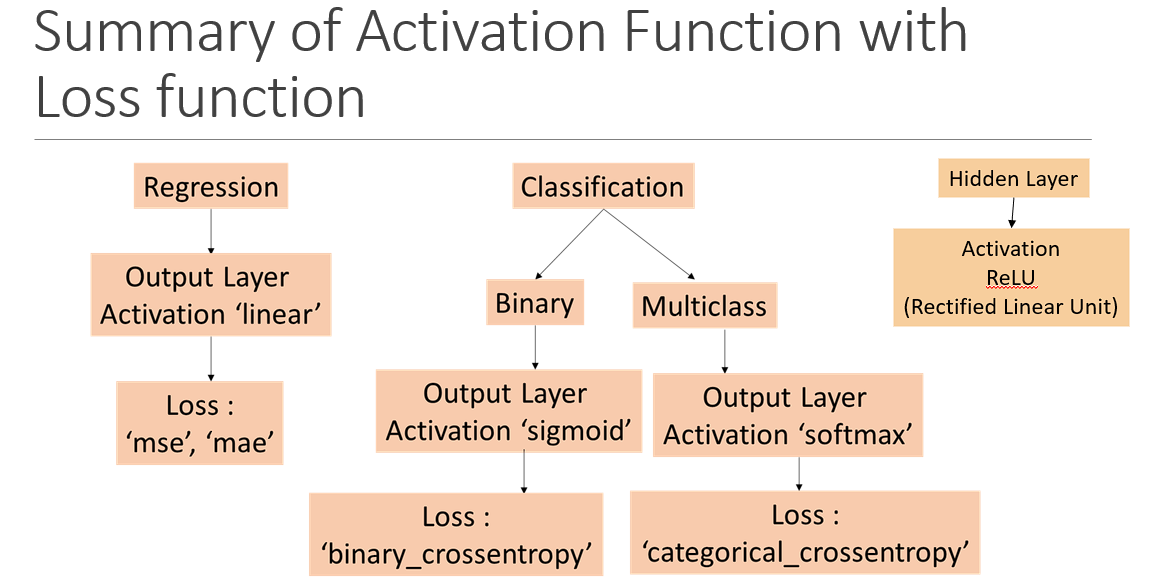

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [34]:
model = Sequential()

# Create Dense layer 1
model.add(Dense(units=64, activation='relu', input_shape=(xtrain.shape[1],)))
# Add dropout layer 1
model.add(Dropout(rate=0.3))
# Create Dense layer 2
model.add(Dense(units=32, activation='relu'))
# Add droput layer 2
model.add(Dropout(rate=0.2))
# Output layer should have 4 neurons because there are 4 classes in this data
model.add(Dense(units=4, activation='softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3556 (13.89 KB)
Trainable params: 3556 (13.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the model

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

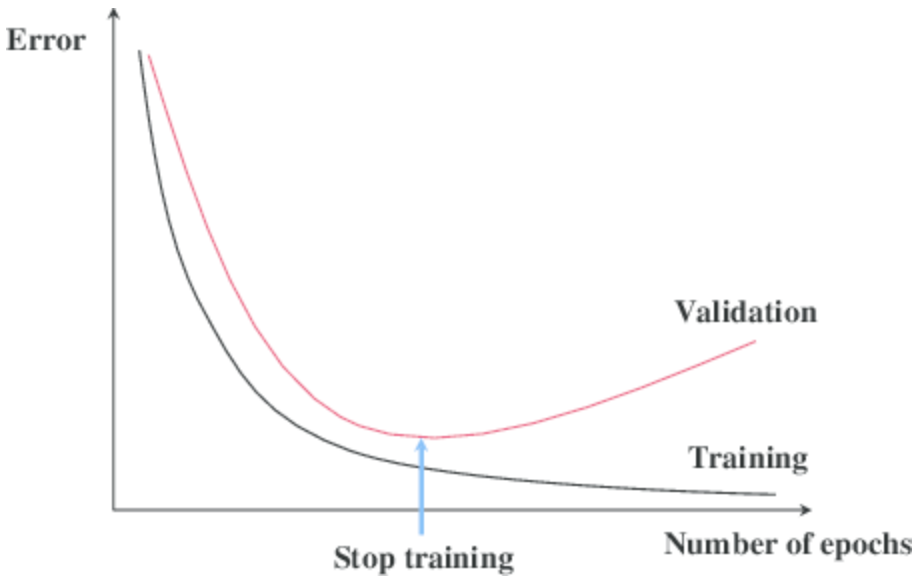

In [37]:
es = EarlyStopping(monitor='val_loss', patience=10)

# Traininh the model

In [38]:
hist = model.fit(xtrain, ytrain_cat, validation_split=0.2,
                 epochs=200, callbacks=[es])

Epoch 1/200
40/40 [==============================] - 1s 8ms/step - loss: 1.4279 - accuracy: 0.2750 - val_loss: 1.3384 - val_accuracy: 0.3844
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 1.3171 - accuracy: 0.3797 - val_loss: 1.2614 - val_accuracy: 0.4688
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 1.2348 - accuracy: 0.4422 - val_loss: 1.1502 - val_accuracy: 0.4875
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 1.1098 - accuracy: 0.5000 - val_loss: 1.0044 - val_accuracy: 0.5688
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.9631 - accuracy: 0.5875 - val_loss: 0.8590 - val_accuracy: 0.6531
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.8513 - accuracy: 0.6039 - val_loss: 0.7332 - val_accuracy: 0.7125
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7398 - accuracy: 0.6773 - val_loss: 0.6393 - val_accuracy: 0.7688
Epoch 8/200
4

# plot the leraning curve

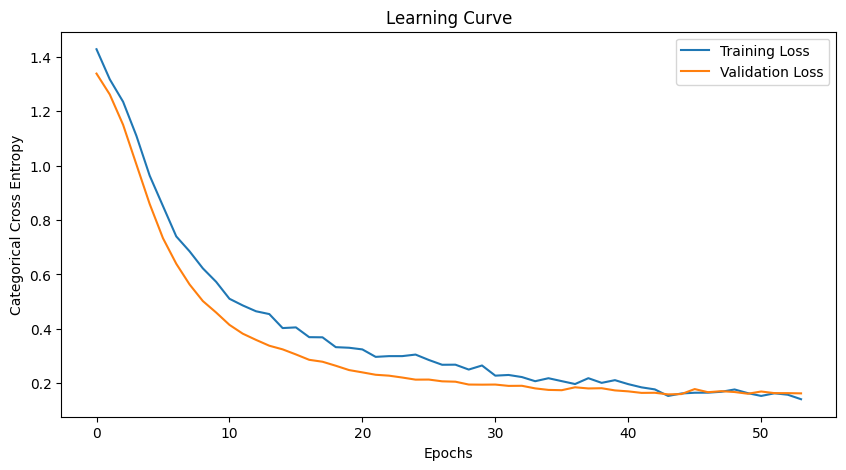

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Evaluate the model

In [40]:
model.evaluate(xtrain, ytrain_cat)

50/50 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9825


[0.07021627575159073, 0.9825000166893005]

In [41]:
model.evaluate(xtest, ytest_cat)

13/13 [==============================] - 0s 3ms/step - loss: 0.1624 - accuracy: 0.9275


[0.16242462396621704, 0.9275000095367432]

# Get probability for train and test

In [42]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

13/13 [==============================] - 0s 2ms/step


In [43]:
yprob_train[0:5]

array([[2.9403309e-05, 7.7852082e-01, 2.2142352e-01, 2.6275689e-05],
       [1.5125830e-18, 3.8161638e-06, 9.1480833e-01, 8.5187823e-02],
       [9.1336262e-01, 8.6637266e-02, 2.6075663e-08, 2.1189028e-18],
       [3.7128579e-21, 2.9751511e-08, 8.9153357e-02, 9.1084665e-01],
       [4.1327171e-04, 9.9110472e-01, 8.4820092e-03, 1.2673082e-08]],
      dtype=float32)

In [44]:
yprob_test[0:5]

array([[9.80548024e-01, 1.94519721e-02, 1.93592670e-10, 2.08563232e-21],
       [1.20247007e-10, 8.18327349e-03, 9.91574287e-01, 2.42354756e-04],
       [3.24743753e-03, 9.94551182e-01, 2.20132596e-03, 8.43848269e-10],
       [3.66387526e-26, 2.93154424e-11, 1.54732750e-03, 9.98452604e-01],
       [4.48690080e-05, 9.76886511e-01, 2.30686516e-02, 1.01634214e-07]],
      dtype=float32)

Get predictions out of probabilty

In [45]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [46]:
ypred_train[0:5]

array([1, 2, 0, 3, 1])

In [47]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [48]:
ypred_test[0:5]

array([0, 2, 1, 3, 1])

In [49]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


plot the confusion matrix

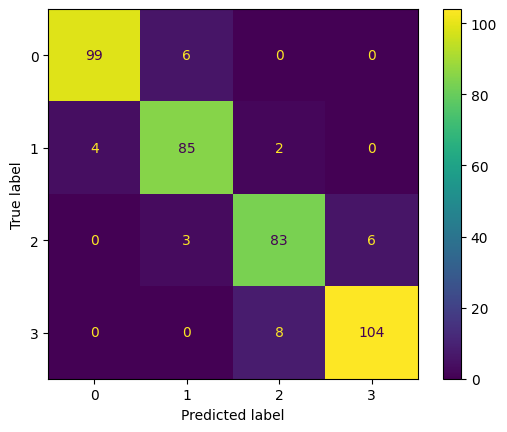

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

# Printing classification report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.90      0.93      0.92        91
           2       0.89      0.90      0.90        92
           3       0.95      0.93      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



# Predicting out of sample data

In [54]:
xnew = pd.read_csv('/test_mobile.csv')
xnew

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [55]:
xnew2 = xnew.drop(columns=['id'])
xnew2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


# Get probabilities for xnew

# Apply pre.transform on Xnew

In [56]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


In [60]:
yprob[0:5]

array([[1.1866996e-20, 2.0401963e-07, 4.1240039e-01, 5.8759934e-01],
       [4.5785671e-29, 5.4026818e-12, 3.1190258e-03, 9.9688107e-01],
       [1.8428892e-15, 4.0122108e-05, 7.9783750e-01, 2.0212238e-01],
       [4.9902395e-33, 2.2927396e-14, 1.6910720e-04, 9.9983096e-01],
       [1.7296782e-03, 9.9097627e-01, 7.2940085e-03, 2.5840027e-08]],
      dtype=float32)

In [59]:
yprob = model.predict(xnew_pre)

32/32 [==============================] - 0s 3ms/step


# Get the predictions from probs

In [61]:
ypred = np.argmax(yprob, axis=1)
ypred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 0, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 3, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 3, 1, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 3, 1, 2, 0, 2, 3, 1,

# Get maximum probabilty

In [62]:
max_probs = np.max(yprob, axis=1)
max_probs[0:5]

array([0.58759934, 0.99688107, 0.7978375 , 0.99983096, 0.9909763 ],
      dtype=float32)

# Saving above results to dataframe

In [63]:
df_final = xnew[['id']]
df_final

,id
0,1
1,2
2,3
3,4
4,5
...,...
995,996
996,997
997,998
998,999


In [64]:
df_final['price_range']=ypred
df_final['Probability']=max_probs

In [65]:
df_final

,id,price_range,Probability
0,1,3,0.587599
1,2,3,0.996881
2,3,2,0.797837
3,4,3,0.999831
4,5,1,0.990976
...,...,...,...
995,996,2,0.934337
996,997,1,0.994886
997,998,1,0.748767
998,999,2,0.981720


In [66]:
df_final['price_range'].value_counts()

3    263
2    258
0    255
1    224
Name: price_range, dtype: int64

# Save above file to csv

In [67]:
df_final.to_csv('Result.csv', index=False)